In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import pdb

torch.set_printoptions(linewidth=120)

In [3]:
# class OHLC(Dataset):
#     def __init__(self,csv_file):
#         self.data=pd.read_csv(csv_file)
    
#     def __getitem(self,index):
#         r=self.data.iloc[index]
#         label=torch.tensor(r.is_up_day,dtype=torch.long)
#         sample=self.normalize(torch.tensor([r.open,r.high,r.low.r.close]))
#         return sample,label
    
#     def __len__(self):
#         return len(self.data)

#### PyTorch Dataset Class

In [4]:
# Extract and Transform data
train_set=torchvision.datasets.FashionMNIST(
    root="./data",train=True,download=True,
    transform=transforms.Compose([transforms.ToTensor()]))


#### PyTorch DataLoader Class

In [5]:
# Load data
train_loader=torch.utils.data.DataLoader(dataset=train_set,batch_size=1000,shuffle=True)

### Exploring The Data

In [6]:
len(train_set)

60000

In [7]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

#### Accessing Data In The Training Set

In [9]:
sample=next(iter(train_set))

In [10]:
len(sample)

2

In [11]:
type(sample)

tuple

In [12]:
image,label=sample

In [13]:
type(image)

torch.Tensor

In [14]:
type(label)

int

In [15]:
image.shape

torch.Size([1, 28, 28])

In [16]:
torch.tensor(label).shape

torch.Size([])

In [17]:
image.squeeze().shape

torch.Size([28, 28])

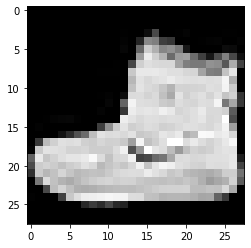

In [18]:
plt.imshow(image.squeeze(),cmap="gray")

In [19]:
torch.tensor(label)

tensor(9)

#### PyTorch DataLoader: Working With Batches Of Data

In [20]:
display_loader=torch.utils.data.DataLoader(train_set,batch_size=10)

In [21]:
batch=next(iter(display_loader))
print("len:",len(batch))

len: 2


In [22]:
type(batch)

list

In [23]:
images,labels=batch

In [24]:
labels.shape

torch.Size([10])

In [25]:
images.shape

torch.Size([10, 1, 28, 28])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


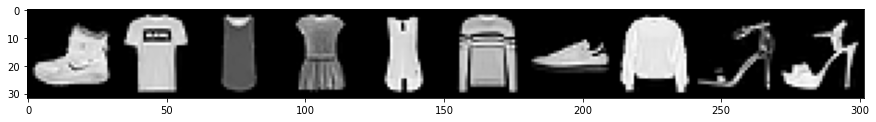

In [26]:
grid=torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print("labels:",labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


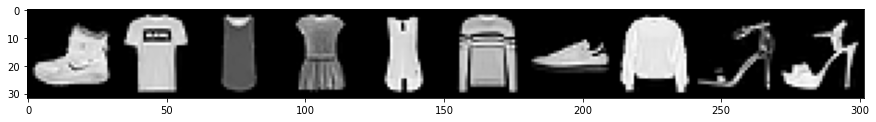

In [27]:
grid=torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))
print("labels:",labels)

In [28]:
len(train_loader)

60

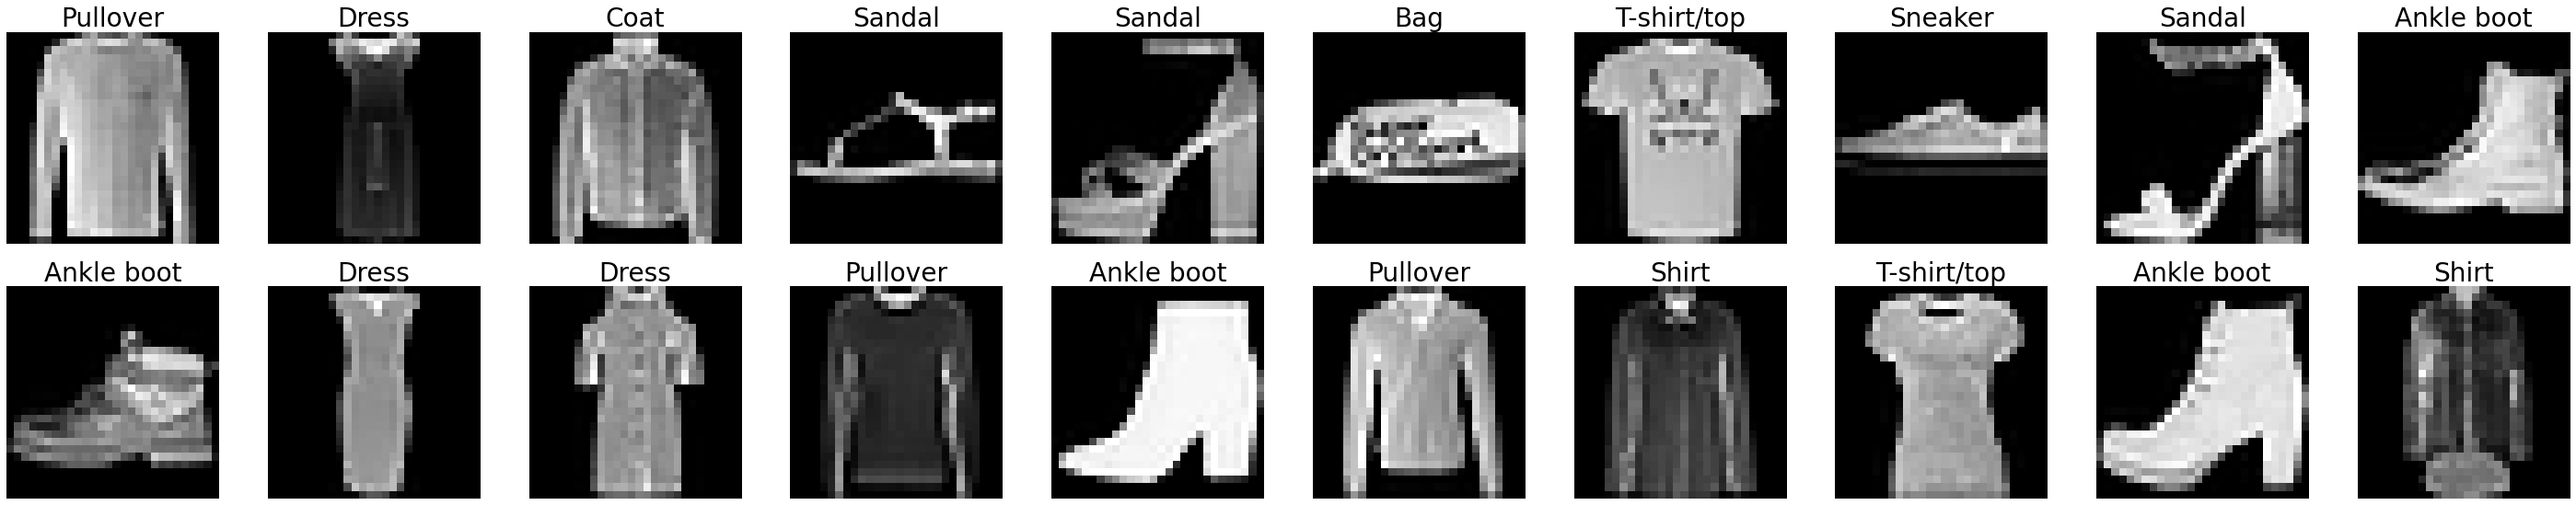

In [29]:
how_many_to_plot=20
train_loader=torch.utils.data.DataLoader(train_set,batch_size=1,shuffle=True)

plt.figure(figsize=(50,50))
for i,batch in enumerate(train_loader,start=1):
    image,label=batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28),cmap="gray")
    plt.axis("off")
    plt.title(train_set.classes[label.item()],fontsize=28)
    if(i>=how_many_to_plot):break

plt.show()

#### Build PyTorch CNN - Object Oriented Neural Networks

In [30]:
class Dogs: #class declaration
    def __init__(self,name):  #class constructor(code)
        self.name=name  #attribute (data)
      
    #custom methods
    def set_name(self,name):    #method declaration  (code)
        self.name = name     #method implementation  (code)

In [31]:
dog=Dogs("Bulldog")
print(dog.name)

Bulldog


In [32]:
dog.set_name("dog")
print(dog.name)

dog


In [33]:
print("Hello {0}".format(dog.name))

Hello dog


#### Simple Neural Network

In [34]:
class Network():
    def __init__(self):
        self.layer=None
        
    def forward(self,t):
        t=self.layer(t)
        return t

In [35]:
net=Network()

In [36]:
import torch.nn as nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer=None
        
    def forward(self,t):
        t=self.layer(t)
        return t

#### Defining The Network’s Layers As Class Attributes

In [37]:
import torch.nn as nn

# class Network(nn.Module):
class Network():    
    def __init__(self):
#         super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
        
    def forward(self,t):
        #implement the forward pass
        return t

In [38]:
network=Network()

In [39]:
print(network)

In [40]:
import torch.nn as nn

# class Network(nn.Module):
class Network():    
    def __init__(self):
#         super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
        
    def forward(self,t):
        #implement the forward pass
        return t
    
    def __repr__(self):
        return "Custom String"

In [41]:
network=Network()

In [42]:
print(network)

Custom String


In [43]:
import torch.nn as nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
        
    def forward(self,t):
        #implement the forward pass
        return t

In [44]:
network=Network()

In [45]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [46]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [47]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [48]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [49]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [50]:
network.out

Linear(in_features=60, out_features=10, bias=True)

#### Layer Weights

In [51]:
network.conv1.weight

Parameter containing:
tensor([[[[ 5.0618e-02,  1.8661e-02,  1.1574e-01, -1.8659e-01, -1.7968e-02],
          [-5.8229e-02,  1.1957e-01,  1.0040e-01, -1.7416e-01,  1.7273e-01],
          [ 1.6667e-01, -1.4863e-02,  9.6868e-02,  1.4337e-01, -1.2292e-01],
          [ 3.6774e-02,  3.1862e-02,  1.5055e-01,  5.2246e-02,  1.2790e-02],
          [-1.4584e-01,  1.7190e-02,  1.9985e-01, -1.4928e-01,  1.3464e-01]]],


        [[[ 6.6046e-02, -5.5361e-02, -1.4485e-01, -7.9268e-02, -9.7818e-02],
          [ 1.8123e-01, -1.3091e-01, -7.2922e-02, -1.3202e-01,  1.9039e-01],
          [-7.2669e-02, -5.9888e-02,  4.4947e-02,  1.5113e-01,  1.1894e-01],
          [ 1.2349e-02, -2.0129e-02,  1.7669e-01,  1.9442e-01,  1.2010e-01],
          [-1.2523e-01, -5.5038e-02,  1.3602e-01, -2.6907e-02, -1.1215e-01]]],


        [[[-1.5204e-01, -1.2287e-01,  1.8071e-01, -3.2262e-02, -2.8543e-02],
          [-9.1856e-03, -1.8537e-01, -7.7165e-03, -5.7239e-02,  1.3721e-01],
          [-1.3251e-01,  1.2550e-01, -9.4378e-

#### Weight Tensor Shape

In [52]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [53]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [54]:
network.fc1.weight.shape

torch.Size([120, 192])

In [55]:
network.fc2.weight.shape

torch.Size([60, 120])

In [56]:
network.out.weight.shape

torch.Size([10, 60])

In [57]:
network.conv2.weight[0].shape

torch.Size([6, 5, 5])

#### Weight Matrix

In [58]:
network.fc1.weight.shape

torch.Size([120, 192])

In [59]:
network.fc2.weight.shape

torch.Size([60, 120])

In [60]:
network.out.weight.shape

torch.Size([10, 60])

In [61]:
in_features=torch.tensor([1,2,3,4],dtype=torch.float32)

In [62]:
weight_matrix=torch.tensor([[1,2,3,4],
                           [2,3,4,5],
                           [3,4,5,6]],
                          dtype=torch.float32)

In [63]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [64]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [66]:
for name, param in network.named_parameters():
    print(name,"\t\t",param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])
